<a href="https://colab.research.google.com/github/carolinehagood/covid-project/blob/main/vaccine_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXPLORATORY DATA ANALYSIS OF U.S COVID VACCINATION(2019 - 2022)

In [97]:
import pandas as pd

#open and read csv file
url = "https://raw.githubusercontent.com/carolinehagood/covid-project/refs/heads/main/data/us-daily-covid-vaccine-doses-administered.csv"
df = pd.read_csv(url)
df.head(5)


,Entity,Code,Day,Daily doses administered (7-day rolling average)
0,Alabama,NaN,2020-01-13,5906
1,Alabama,NaN,2020-01-14,7083
2,Alabama,NaN,2020-01-15,7478
3,Alabama,NaN,2020-01-16,7498
4,Alabama,NaN,2020-01-17,7509


In [98]:
#drop column Code, since it is not relevant
df = df.drop(columns=['Code'])

#Rename state column and doses column for clarity and efficiency
df = df.rename(columns={'Entity': 'State', 'Daily doses administered (7-day rolling average)': 'Doses'})

In [99]:
df.head(5)

,State,Day,Doses
0,Alabama,2020-01-13,5906
1,Alabama,2020-01-14,7083
2,Alabama,2020-01-15,7478
3,Alabama,2020-01-16,7498
4,Alabama,2020-01-17,7509


In [100]:
#filter data to exclude data per state, and only include total national data for each day
df_filtered = df[df['State'] == 'United States']
df_filtered.head(5)

,State,Day,Doses
46060,United States,2019-12-21,57909
46061,United States,2019-12-22,127432
46062,United States,2019-12-23,150606
46063,United States,2019-12-24,191001
46064,United States,2019-12-25,215238


In [101]:
df_filtered = df_filtered.drop(columns=['State'])
df_filtered.head(5)

,Day,Doses
46060,2019-12-21,57909
46061,2019-12-22,127432
46062,2019-12-23,150606
46063,2019-12-24,191001
46064,2019-12-25,215238


In [102]:
df_filtered.isna().sum()

,0
Day,0
Doses,0


In [103]:
# What is the range of Day variable?
print(df_filtered['Day'].max())
print(df_filtered['Day'].min())

2022-05-09
2019-12-21


In [104]:
# Select year from day
df_filtered['Year']= df_filtered['Day'].str[:4]

In [105]:
# Convert Day to Date Time
df_filtered['Day']= pd.to_datetime(df_filtered['Day'])

# Extract the week number
df_filtered['Week'] = df_filtered['Day'].dt.isocalendar().week
df_filtered.head(10)

,Day,Doses,Year,Week
46060,2019-12-21,57909,2019,51
46061,2019-12-22,127432,2019,51
46062,2019-12-23,150606,2019,52
46063,2019-12-24,191001,2019,52
46064,2019-12-25,215238,2019,52
46065,2019-12-26,231396,2019,52
46066,2019-12-27,211379,2019,52
46067,2019-12-28,216147,2019,52
46068,2019-12-29,235685,2019,52
46069,2019-12-30,255223,2019,1


In [106]:
df_filtered['Day'].dtypes

dtype('<M8[ns]')

In [107]:
#df_filtered['Day'] = pd.to_datetime(df_filtered['Day'])

df_filtered = df_filtered.sort_values('Day')

df_filtered.set_index('Day', inplace=True)

weekly_data = df_filtered.resample('W-SAT', origin='2019-12-29').sum()

weekly_summary = pd.DataFrame({
    'Start_Date': weekly_data.index - pd.to_timedelta(6, unit='d'),
    'End_Date': weekly_data.index,
    'Total_Doses': weekly_data['Doses'],

})


In [108]:
weekly_summary

,Start_Date,End_Date,Total_Doses
Day,,,
2019-12-21,2019-12-15,2019-12-21,57909
2019-12-28,2019-12-22,2019-12-28,1343199
2020-01-04,2019-12-29,2020-01-04,2082861
2020-01-11,2020-01-05,2020-01-11,3136353
2020-01-18,2020-01-12,2020-01-18,5371448
...,...,...,...
2022-04-16,2022-04-10,2022-04-16,333375
2022-04-23,2022-04-17,2022-04-23,359286
2022-04-30,2022-04-24,2022-04-30,461086


In [109]:
weekly_summary['Week'] = weekly_summary['End_Date'].dt.isocalendar().week
weekly_summary['Week']= weekly_summary['Week'].astype(float)

In [110]:
weekly_summary

,Start_Date,End_Date,Total_Doses,Week
Day,,,,
2019-12-21,2019-12-15,2019-12-21,57909,51.0
2019-12-28,2019-12-22,2019-12-28,1343199,52.0
2020-01-04,2019-12-29,2020-01-04,2082861,1.0
2020-01-11,2020-01-05,2020-01-11,3136353,2.0
2020-01-18,2020-01-12,2020-01-18,5371448,3.0
...,...,...,...,...
2022-04-16,2022-04-10,2022-04-16,333375,15.0
2022-04-23,2022-04-17,2022-04-23,359286,16.0
2022-04-30,2022-04-24,2022-04-30,461086,17.0


In [111]:
#weekly_summary.to_csv('clean_vaccine_data.csv')

In [112]:
# Filter by year and sort values by week
df_2020= df_filtered[df_filtered['Year']== '2020'].sort_values('Week')
df_2021= df_filtered[df_filtered['Year']== '2021'].sort_values('Week')
df_2022= df_filtered[df_filtered['Year']== '2022'].sort_values('Week')

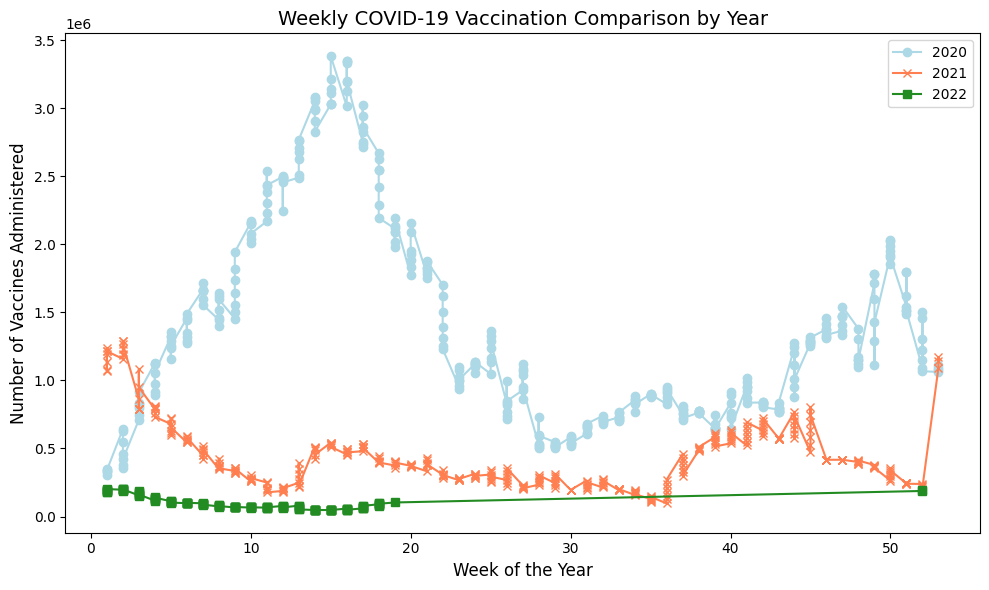

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot for 2020
plt.plot(df_2020['Week'], df_2020['Doses'], label='2020', color='lightblue', linestyle='-', marker='o')

# Plot for 2021
plt.plot(df_2021['Week'], df_2021['Doses'], label='2021', color='coral', linestyle='-', marker='x')

# Plot for 2022
plt.plot(df_2022['Week'], df_2022['Doses'], label='2022', color='forestgreen', linestyle='-', marker='s')

# Add titles and labels
plt.title('Weekly COVID-19 Vaccination Comparison by Year', fontsize=14)
plt.xlabel('Week of the Year', fontsize=12)
plt.ylabel('Number of Vaccines Administered', fontsize=12)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

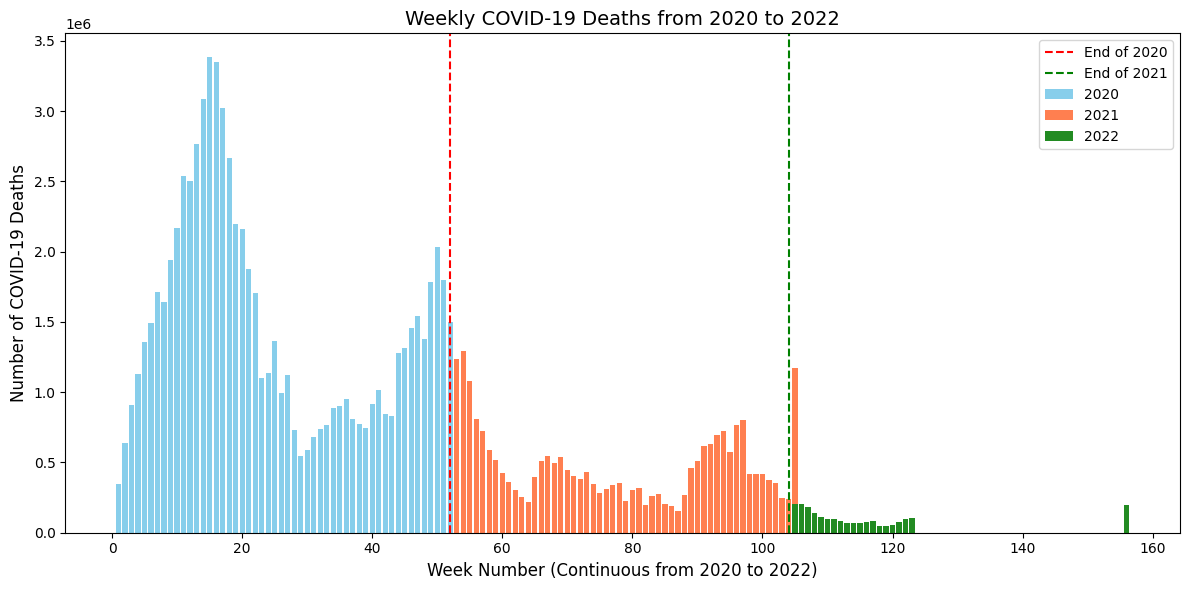

In [114]:
df_2020['Year'] = 2020
df_2021['Year'] = 2021
df_2022['Year'] = 2022

# Concatenate the data for all three years
df_all = pd.concat([df_2020, df_2021, df_2022])

# Sort the combined DataFrame by 'Year' and 'MMWR'
df_all = df_all.sort_values(by=['Year', 'Week'])

# Create a continuous 'Week_Number' for plotting (52 weeks for each year)
# This ensures that weeks for 2021 and 2022 flow sequentially
df_all['Week_Number'] = df_all['Week'] + (df_all['Year'] - 2020) * 52

# Create the bar plot
plt.figure(figsize=(12, 6))

# Plot the data for 2020
plt.bar(df_all[df_all['Year'] == 2020]['Week_Number'],
        df_all[df_all['Year'] == 2020]['Doses'],
        color='skyblue', label='2020')

# Plot the data for 2021
plt.bar(df_all[df_all['Year'] == 2021]['Week_Number'],
        df_all[df_all['Year'] == 2021]['Doses'],
        color='coral', label='2021')

# Plot the data for 2022
plt.bar(df_all[df_all['Year'] == 2022]['Week_Number'],
        df_all[df_all['Year'] == 2022]['Doses'],
        color='forestgreen', label='2022')

# Add vertical lines to indicate year changes
plt.axvline(x=52, color='red', linestyle='--', label='End of 2020')
plt.axvline(x=104, color='green', linestyle='--', label='End of 2021')

# Add titles and labels
plt.title('Weekly COVID-19 Deaths from 2020 to 2022', fontsize=14)
plt.xlabel('Week Number (Continuous from 2020 to 2022)', fontsize=12)
plt.ylabel('Number of COVID-19 Deaths', fontsize=12)

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [115]:
df_filtered.dtypes

,0
Doses,int64
Year,object
Week,UInt32
